In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
edges = {'A':{'B':2, 'D':5, 'E':5}, 'B':{'A':2, 'D':1}}

In [6]:
import networkx.generators.small

In [7]:
g=networkx.generators.small.krackhardt_kite_graph()

In [124]:
g.number_of_edges()

18

In [125]:
g.number_of_nodes()
g.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [126]:
g.adjacency_list()

[[1, 2, 3, 5],
 [0, 3, 4, 6],
 [0, 3, 5],
 [0, 1, 2, 4, 5, 6],
 [1, 3, 6],
 [0, 2, 3, 6, 7],
 [1, 3, 4, 5, 7],
 [5, 6, 8],
 [7, 9],
 [8]]

In [15]:
g.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 4),
 (1, 6),
 (2, 3),
 (2, 5),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 6),
 (5, 6),
 (5, 7),
 (6, 7),
 (7, 8),
 (8, 9)]

In [21]:
dict((x,g.neighbors(x)) for x in g.nodes())

{0: [1, 2, 3, 5],
 1: [0, 3, 4, 6],
 2: [0, 3, 5],
 3: [0, 1, 2, 4, 5, 6],
 4: [1, 3, 6],
 5: [0, 2, 3, 6, 7],
 6: [1, 3, 4, 5, 7],
 7: [5, 6, 8],
 8: [7, 9],
 9: [8]}

/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

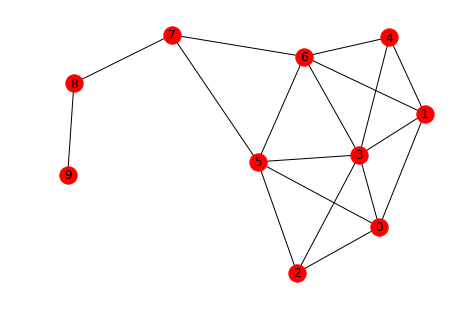

In [127]:
nx.draw(g,with_labels=True)
plt.show()

In [39]:
%doctest_mode

Exception reporting mode: Context
Doctest mode is: OFF


In [44]:
from networkx.algorithms import traversal

In [46]:
def DFS_nodes(graph, node, visited=[]):
    visited.append(node)
    for neighbor in graph[node]:
        if not neighbor in visited:
            DFS_nodes(graph, neighbor, visited)
    return visited

In [48]:
def DFS_edges(graph, node, visited=[], edges=[]):
    visited.append(node)
    for ni in graph[node]:
        if not ni in visited:
            edges.append((node, ni))
            DFS_edges(graph, ni, visited, edges)
    return edges

In [50]:
DFS_nodes(g, 0)

[0, 1, 3, 2, 5, 6, 4, 7, 8, 9, 0]

In [52]:
DFS_edges(g, 0)

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

In [56]:
g.neighbors(0)
g[1]

{0: {}, 3: {}, 4: {}, 6: {}}

In [59]:
edges = traversal.dfs_edges(g)
list(edges)

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

In [60]:
traversal.dfs_successors(g)

{0: [1], 1: [3], 2: [5], 3: [2], 5: [6], 6: [4, 7], 7: [8], 8: [9]}

In [65]:
tree = traversal.dfs_tree(g,0)
tree.succ

{0: {1: {}},
 1: {3: {}},
 2: {5: {}},
 3: {2: {}},
 4: {},
 5: {6: {}},
 6: {4: {}, 7: {}},
 7: {8: {}},
 8: {9: {}},
 9: {}}

In [66]:
traversal.bfs_successors(g, 0)

{0: [1, 2, 3, 5], 1: [4, 6], 5: [7], 7: [8], 8: [9]}

In [67]:
traversal.dfs_successors(g, 0)

{0: [1], 1: [3], 2: [5], 3: [2], 5: [6], 6: [4, 7], 7: [8], 8: [9]}

In [14]:
from networkx import algorithms

In [17]:
algorithms.shortest_path(g,0,8)

[0, 5, 7, 8]

In [72]:
algorithms.average_shortest_path_length(g)

1.9777777777777779

In [73]:
algorithms.all_pairs_shortest_path(g)

{0: {0: [0],
  1: [0, 1],
  2: [0, 2],
  3: [0, 3],
  4: [0, 1, 4],
  5: [0, 5],
  6: [0, 1, 6],
  7: [0, 5, 7],
  8: [0, 5, 7, 8],
  9: [0, 5, 7, 8, 9]},
 1: {0: [1, 0],
  1: [1],
  2: [1, 0, 2],
  3: [1, 3],
  4: [1, 4],
  5: [1, 0, 5],
  6: [1, 6],
  7: [1, 6, 7],
  8: [1, 6, 7, 8],
  9: [1, 6, 7, 8, 9]},
 2: {0: [2, 0],
  1: [2, 0, 1],
  2: [2],
  3: [2, 3],
  4: [2, 3, 4],
  5: [2, 5],
  6: [2, 3, 6],
  7: [2, 5, 7],
  8: [2, 5, 7, 8],
  9: [2, 5, 7, 8, 9]},
 3: {0: [3, 0],
  1: [3, 1],
  2: [3, 2],
  3: [3],
  4: [3, 4],
  5: [3, 5],
  6: [3, 6],
  7: [3, 5, 7],
  8: [3, 5, 7, 8],
  9: [3, 5, 7, 8, 9]},
 4: {0: [4, 1, 0],
  1: [4, 1],
  2: [4, 3, 2],
  3: [4, 3],
  4: [4],
  5: [4, 3, 5],
  6: [4, 6],
  7: [4, 6, 7],
  8: [4, 6, 7, 8],
  9: [4, 6, 7, 8, 9]},
 5: {0: [5, 0],
  1: [5, 0, 1],
  2: [5, 2],
  3: [5, 3],
  4: [5, 3, 4],
  5: [5],
  6: [5, 6],
  7: [5, 7],
  8: [5, 7, 8],
  9: [5, 7, 8, 9]},
 6: {0: [6, 1, 0],
  1: [6, 1],
  2: [6, 3, 2],
  3: [6, 3],
  4: [6, 4],
  5: 

In [74]:
algorithms.dijkstra_path(g, 1, 5)

[1, 0, 5]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

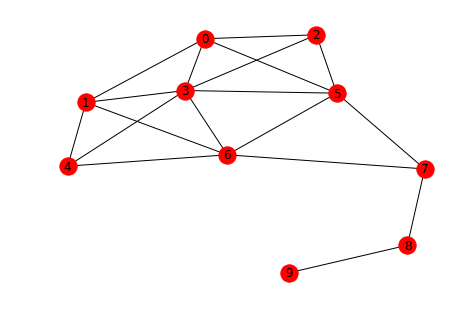

In [76]:
nx.draw(g,with_labels=True)
plt.show()

In [2]:
import itertools
list(itertools.combinations(g.nodes(), 2))

NameError: name 'g' is not defined

In [9]:
nn = g.nodes()
pairs = list(itertools.combinations(g.nodes()[:4], 2))
pairs

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

In [109]:
g.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 4),
 (1, 6),
 (2, 3),
 (2, 5),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 6),
 (5, 6),
 (5, 7),
 (6, 7),
 (7, 8),
 (8, 9)]

In [90]:
for pair in itertools.combinations(nn[:8], 2):
    print(algorithms.shortest_path(g, *pair), algorithms.dijkstra_path(g, *pair))

[0, 1] [0, 1]
[0, 2] [0, 2]
[0, 3] [0, 3]
[0, 1, 4] [0, 1, 4]
[0, 5] [0, 5]
[0, 1, 6] [0, 1, 6]
[0, 5, 7] [0, 5, 7]
[1, 0, 2] [1, 0, 2]
[1, 3] [1, 3]
[1, 4] [1, 4]
[1, 0, 5] [1, 0, 5]
[1, 6] [1, 6]
[1, 6, 7] [1, 6, 7]
[2, 3] [2, 3]
[2, 3, 4] [2, 3, 4]
[2, 5] [2, 5]
[2, 3, 6] [2, 3, 6]
[2, 5, 7] [2, 5, 7]
[3, 4] [3, 4]
[3, 5] [3, 5]
[3, 6] [3, 6]
[3, 5, 7] [3, 5, 7]
[4, 3, 5] [4, 3, 5]
[4, 6] [4, 6]
[4, 6, 7] [4, 6, 7]
[5, 6] [5, 6]
[5, 7] [5, 7]
[6, 7] [6, 7]


In [107]:
from random import choice
choice(range(10))

2

In [128]:
from random import choice
new_edges = [x + (choice(range(10)),) for x in g.edges()]
g.add_weighted_edges_from(new_edges)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

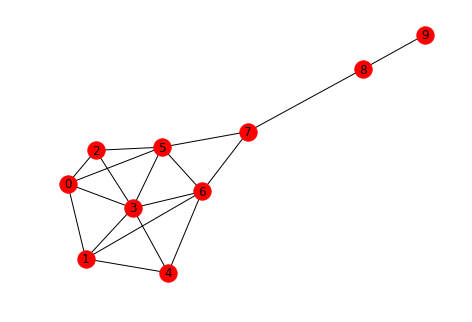

In [129]:
nx.draw(g,with_labels=True,)
plt.show()

In [10]:
for pair in itertools.combinations(nn[:8], 2):
    #print(algorithms.shortest_path(g, *pair), algorithms.dijkstra_path(g, *pair))
    print( *pair)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
1 2
1 3
1 4
1 5
1 6
1 7
2 3
2 4
2 5
2 6
2 7
3 4
3 5
3 6
3 7
4 5
4 6
4 7
5 6
5 7
6 7


In [11]:
nn

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [20]:
nx.diameter(g)

4

In [21]:
nx.is_connected(g)

True

In [29]:
def bfs_path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return queue
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
        
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

In [31]:
bfs_path_exists(g,0,9)

Path exists between nodes 0 and 9


[0,
 1,
 2,
 3,
 5,
 3,
 4,
 6,
 3,
 5,
 4,
 5,
 6,
 6,
 7,
 4,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8]

In [96]:
def dfs_path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = []
    queue = [node1]
    
    for node in queue:  
        neighbors = [n for n in G.neighbors(node) if n not in visited_nodes]
        if len(neighbors) == 0:
            first_neighbour = node
        else:
            first_neighbour = neighbors[0]
        visited_nodes.append(node)
        if node2 == first_neighbour:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return visited_nodes
            break

        else:
            visited_nodes.append(first_neighbour)
            new_neighbor = [n for n in G.neighbors(first_neighbour) if n not in visited_nodes]
            queue.extend([new_neighbor[0]])

In [98]:
dfs_path_exists(g,0,7)

IndexError: list index out of range

In [67]:
visited_nodes =[0]
g.neighbors(0) not in visited_nodes

True

In [44]:
[g.neighbors(g.neighbors[0])[0]]

NameError: name 'neighbors' is not defined

In [ ]:
ab